In [865]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Code optionnel pour éliminer les warnings

from warnings import filterwarnings
filterwarnings('ignore')

Text(0, 0.5, 'y=f(x)')

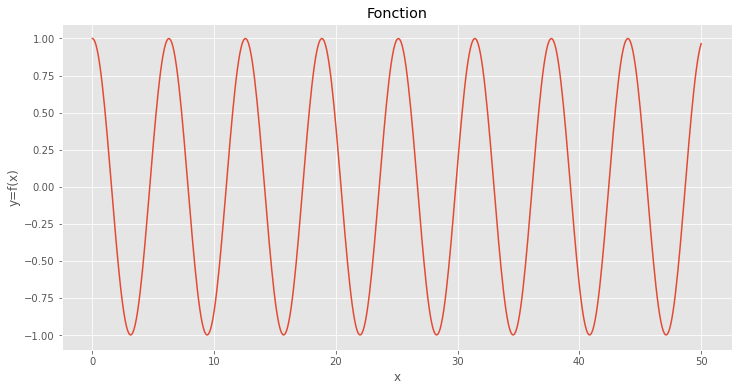

In [866]:
plt.figure(figsize=(12,6))
x = np.linspace(0,50,500)
y = np.cos(x)
plt.plot(x,y)
plt.title('Fonction')
plt.xlabel('x')
plt.ylabel('y=f(x)')

In [867]:
df = pd.DataFrame(data=y, index=x, columns=['f(x)'])
df.head()

,f(x)
0.000000,1.000000
0.100200,0.994984
0.200401,0.979987
0.300601,0.955159
0.400802,0.920749


<h1>Répartition Train/Test<h1>

In [868]:
len(df)

500

In [869]:
test_pourcent=0.3  #20% des données pour les tests

In [870]:
#point de separation du jeu de train et du jeu de test
len(df)*test_pourcent

150.0

In [871]:
index_sep=int(len(df)-len(df)*test_pourcent)
index_sep

350

In [872]:
train_set=df.iloc[:index_sep]
test_set=df.iloc[index_sep:]

In [873]:
train_set

,f(x)
0.000000,1.000000
0.100200,0.994984
0.200401,0.979987
0.300601,0.955159
0.400802,0.920749
...,...
34.569138,-0.999932
34.669339,-0.993755
34.769539,-0.977608
34.869739,-0.951654


In [874]:
test_set

,f(x)
35.070140,-0.871462
35.170341,-0.818028
35.270541,-0.756389
35.370741,-0.687161
35.470942,-0.611040
...,...
49.599198,0.786124
49.699399,0.844008
49.799599,0.893425
49.899800,0.933880


<h1>Mise à l'échelle des données </h1>

In [875]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [876]:
scaler = MMS()
scaler.fit(train_set)

MinMaxScaler()

In [877]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [878]:
#Class pour générer des batch ou lot de sequence temporel
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length=50
batch_size=1

generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [879]:
len(generator)

300

In [880]:
X,y=generator[0] 

In [881]:
X

array([[[1.00000000e+00],
        [9.97492047e-01],
        [9.89993348e-01],
        [9.77579127e-01],
        [9.60373920e-01],
        [9.38550325e-01],
        [9.12327271e-01],
        [8.81967820e-01],
        [8.47776529e-01],
        [8.10096397e-01],
        [7.69305419e-01],
        [7.25812799e-01],
        [6.80054844e-01],
        [6.32490584e-01],
        [5.83597171e-01],
        [5.33865090e-01],
        [4.83793240e-01],
        [4.33883927e-01],
        [3.84637828e-01],
        [3.36548967e-01],
        [2.90099756e-01],
        [2.45756162e-01],
        [2.03963028e-01],
        [1.65139610e-01],
        [1.29675375e-01],
        [9.79260892e-02],
        [7.02102533e-02],
        [4.68059048e-02],
        [2.79478296e-02],
        [1.38252066e-02],
        [4.57971015e-03],
        [3.04088465e-04],
        [1.04123340e-03],
        [6.78375012e-03],
        [1.74740313e-02],
        [3.30048350e-02],
        [5.32203605e-02],
        [7.79178112e-02],
        [1.0

In [882]:
y

array([[0.646625]])

<h1>Création du modèle </h1>

In [883]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [884]:
n_features=1

In [885]:
model=Sequential()


In [886]:
model.add(SimpleRNN(62, input_shape=(length,n_features)))  #SimpleRNN
#model.add(LSTM(50, batch_input_shape=(length,n_features,1), stateful=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [887]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 62)                3968      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 63        
Total params: 4,031
Trainable params: 4,031
Non-trainable params: 0
_________________________________________________________________


In [888]:
model.fit(generator, epochs=8)

Epoch 1/8
300/300 [==============================] - 2s 4ms/step - loss: 0.0189
Epoch 2/8
300/300 [==============================] - 1s 4ms/step - loss: 1.2544e-05
Epoch 3/8
300/300 [==============================] - 1s 4ms/step - loss: 3.4986e-04
Epoch 4/8
300/300 [==============================] - 1s 5ms/step - loss: 7.3428e-04
Epoch 5/8
300/300 [==============================] - 1s 4ms/step - loss: 8.3109e-06
Epoch 6/8
300/300 [==============================] - 1s 4ms/step - loss: 2.2489e-04
Epoch 7/8
300/300 [==============================] - 1s 4ms/step - loss: 1.3068e-04
Epoch 8/8
300/300 [==============================] - 1s 4ms/step - loss: 3.1433e-05


<AxesSubplot:>

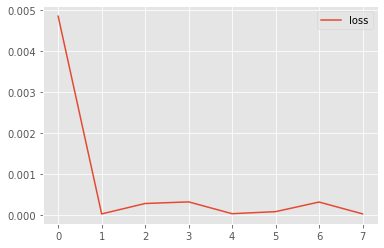

In [889]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [890]:
first_eval_batch=scaled_train[-length:]

In [891]:
first_eval_batch=first_eval_batch.reshape(1,length, n_features)

In [892]:
model.predict(first_eval_batch)

array([[0.06434172]], dtype=float32)

In [893]:
scaled_test[0]

array([0.06426077])

In [894]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length, n_features)

In [895]:
first_eval_batch

array([[6.06665375e-01],
       [6.54995720e-01],
       [7.01771148e-01],
       [7.46522419e-01],
       [7.88800601e-01],
       [8.28181571e-01],
       [8.64270270e-01],
       [8.96704667e-01],
       [9.25159388e-01],
       [9.49348984e-01],
       [9.69030792e-01],
       [9.84007368e-01],
       [9.94128472e-01],
       [9.99292572e-01],
       [9.99447863e-01],
       [9.94592787e-01],
       [9.84776050e-01],
       [9.70096129e-01],
       [9.50700289e-01],
       [9.26783106e-01],
       [8.98584508e-01],
       [8.66387376e-01],
       [8.30514704e-01],
       [7.91326356e-01],
       [7.49215458e-01],
       [7.04604455e-01],
       [6.57940874e-01],
       [6.09692828e-01],
       [5.60344331e-01],
       [5.10390431e-01],
       [4.60332254e-01],
       [4.10671968e-01],
       [3.61907752e-01],
       [3.14528794e-01],
       [2.69010389e-01],
       [2.25809162e-01],
       [1.85358498e-01],
       [1.48064186e-01],
       [1.14300353e-01],
       [8.44057065e-02],


In [896]:
np.append(current_batch[:,1:,:],[[[99]]], axis=1)

array([[[6.54995720e-01],
        [7.01771148e-01],
        [7.46522419e-01],
        [7.88800601e-01],
        [8.28181571e-01],
        [8.64270270e-01],
        [8.96704667e-01],
        [9.25159388e-01],
        [9.49348984e-01],
        [9.69030792e-01],
        [9.84007368e-01],
        [9.94128472e-01],
        [9.99292572e-01],
        [9.99447863e-01],
        [9.94592787e-01],
        [9.84776050e-01],
        [9.70096129e-01],
        [9.50700289e-01],
        [9.26783106e-01],
        [8.98584508e-01],
        [8.66387376e-01],
        [8.30514704e-01],
        [7.91326356e-01],
        [7.49215458e-01],
        [7.04604455e-01],
        [6.57940874e-01],
        [6.09692828e-01],
        [5.60344331e-01],
        [5.10390431e-01],
        [4.60332254e-01],
        [4.10671968e-01],
        [3.61907752e-01],
        [3.14528794e-01],
        [2.69010389e-01],
        [2.25809162e-01],
        [1.85358498e-01],
        [1.48064186e-01],
        [1.14300353e-01],
        [8.4

In [897]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]  #length derniers points
current_batch=first_eval_batch.reshape(1,length, n_features)

for i in range(len(test_set)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)  #décalage de current_batch
    

In [898]:
 test_predictions

[array([0.06434172], dtype=float32),
 array([0.09028157], dtype=float32),
 array([0.1201238], dtype=float32),
 array([0.15365167], dtype=float32),
 array([0.19038384], dtype=float32),
 array([0.23001194], dtype=float32),
 array([0.2720622], dtype=float32),
 array([0.31625572], dtype=float32),
 array([0.36226332], dtype=float32),
 array([0.4099409], dtype=float32),
 array([0.45862153], dtype=float32),
 array([0.5079869], dtype=float32),
 array([0.55773795], dtype=float32),
 array([0.6074377], dtype=float32),
 array([0.65656275], dtype=float32),
 array([0.7045046], dtype=float32),
 array([0.7507749], dtype=float32),
 array([0.79484886], dtype=float32),
 array([0.83626693], dtype=float32),
 array([0.87427026], dtype=float32),
 array([0.90846854], dtype=float32),
 array([0.9383469], dtype=float32),
 array([0.9635657], dtype=float32),
 array([0.9839955], dtype=float32),
 array([0.99919784], dtype=float32),
 array([1.009008], dtype=float32),
 array([1.013455], dtype=float32),
 array([1.01258

In [899]:
scaled_test

array([[6.42607681e-02],
       [9.09777726e-02],
       [1.21797930e-01],
       [1.56412062e-01],
       [1.94472929e-01],
       [2.35598714e-01],
       [2.79376856e-01],
       [3.25368183e-01],
       [3.73111324e-01],
       [4.22127333e-01],
       [4.71924495e-01],
       [5.22003258e-01],
       [5.71861246e-01],
       [6.20998298e-01],
       [6.68921484e-01],
       [7.15150053e-01],
       [7.59220251e-01],
       [8.00689980e-01],
       [8.39143226e-01],
       [8.74194237e-01],
       [9.05491390e-01],
       [9.32720722e-01],
       [9.55609076e-01],
       [9.73926841e-01],
       [9.87490260e-01],
       [9.96163267e-01],
       [9.99858857e-01],
       [9.98539958e-01],
       [9.92219800e-01],
       [9.80961785e-01],
       [9.64878850e-01],
       [9.44132336e-01],
       [9.18930364e-01],
       [8.89525756e-01],
       [8.56213488e-01],
       [8.19327741e-01],
       [7.79238543e-01],
       [7.36348057e-01],
       [6.91086548e-01],
       [6.43908068e-01],


In [900]:
true_predictions=scaler.inverse_transform(test_predictions)

In [901]:
true_predictions

array([[-0.87130006],
       [-0.81942081],
       [-0.75973687],
       [-0.69268173],
       [-0.61921804],
       [-0.53996253],
       [-0.45586273],
       [-0.3674765 ],
       [-0.2754621 ],
       [-0.18010779],
       [-0.08274738],
       [ 0.01598249],
       [ 0.1154837 ],
       [ 0.21488227],
       [ 0.31313155],
       [ 0.40901443],
       [ 0.50155424],
       [ 0.58970134],
       [ 0.67253676],
       [ 0.74854274],
       [ 0.8169387 ],
       [ 0.87669493],
       [ 0.92713206],
       [ 0.96799128],
       [ 0.9983957 ],
       [ 1.01801594],
       [ 1.02690983],
       [ 1.02516414],
       [ 1.01284826],
       [ 0.99007234],
       [ 0.9572201 ],
       [ 0.91486696],
       [ 0.86350216],
       [ 0.80371553],
       [ 0.73604006],
       [ 0.66124082],
       [ 0.58019281],
       [ 0.49364274],
       [ 0.40235558],
       [ 0.30712453],
       [ 0.20881218],
       [ 0.10844242],
       [ 0.00687081],
       [-0.09504419],
       [-0.19621426],
       [-0

In [902]:
test_set['Pred']=true_predictions

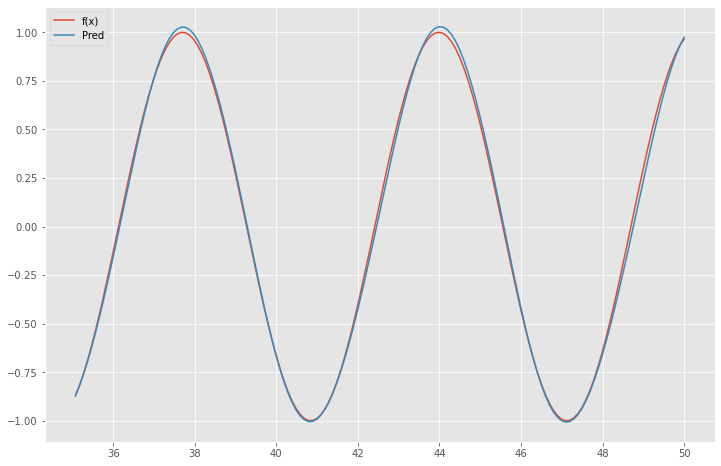

In [903]:
test_set.plot(figsize=(12,8))
plt.savefig("Courbe_prédiction.pdf")